In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from typing import List
import matplotlib as mpl
from matplotlib import rc
# plt.rc('font', family='Times New Roman')

In [9]:
latex = True
#plotting and colour set ups
if latex:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
#         'text.usetex': True,
        'pgf.rcfonts': False,
    })

In [3]:
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [4]:
naming_dict = {'unet': 'UNet', 'lbc_unet': 'LBC UNet', 'deeplab_mobile_net': 'MobileNetV3 (DeepLabV3)', 'lraspp_mobile_net': 'MobileNetV3 (LR-ASPP)',
       'dsc_unet': 'DSC UNet', 'small_dsc_unet': 'Small DSC UNet', 'dsc_lbc_unet': 'DSC LBC UNet', 'small_dsc_lbc_unet': 'Small DSC LBC UNet',
       'small_unet': 'Small UNet', 'small_lbc_unet': 'Small LBC UNet'}

In [5]:
curve_dict = {}
curve_dir = '/home/dsola/repos/PGA-Net/data/training_curves'

for folder in os.listdir(curve_dir):
    model_dict = {}
    for file in os.listdir(os.path.join(curve_dir, folder)):
        df = pd.read_csv(os.path.join(curve_dir, folder, file))
        measurement = df[df.columns[[1]]].columns[0]
        if 'Acc' in measurement:
            model_dict['acc'] = [x.item() for x in df[df.columns[[1]]].values]
        elif 'IoU' in measurement:
            model_dict['iou'] = [x.item() for x in df[df.columns[[1]]].values]
        elif 'Loss' in measurement:
            model_dict['loss'] = [x.item() for x in df[df.columns[[1]]].values]
    curve_dict[folder] = model_dict

In [6]:
small_list = ['small_unet', 'small_dsc_unet', 'small_lbc_unet', 'small_dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']
full_list = ['unet', 'dsc_unet', 'lbc_unet', 'dsc_lbc_unet', 'deeplab_mobile_net', 'lraspp_mobile_net']

In [7]:
# import cycler

# n = 6
# color = plt.cm.Paired(np.linspace(0, 1,n))
# mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

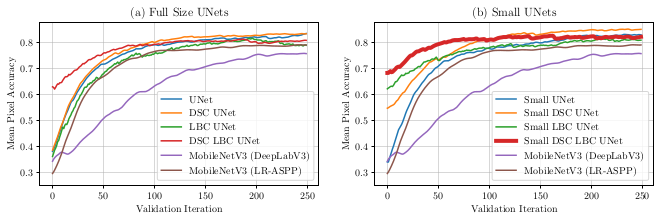

In [10]:
fig, axs = plt.subplots(1,2, figsize=(11,3))
for model in full_list:
    data = curve_dict[model]['acc'][:250]
    if model == 'lbc_unet' or model == 'deeplab_mobile_net':
        data[0] = min(data)
    data_smooth = smooth(scalars=data, weight=0.95)
#     ax.plot(data, label=model)
    axs[0].plot(data_smooth, label=naming_dict[model])
axs[0].grid(alpha=0.5)
axs[0].legend()
axs[0].set_xlabel('Validation Iteration')
axs[0].set_ylabel('Mean Pixel Accuracy')
axs[0].set_title('(a) Full Size UNets')
axs[0].set_ylim(0.25, 0.88)

for model in small_list:
    data = curve_dict[model]['acc'][:250]
    if model == 'lbc_unet' or model == 'deeplab_mobile_net':
        data[0] = min(data)
    data_smooth = smooth(scalars=data, weight=0.95)
#     ax.plot(data, label=model)
    if model == 'small_dsc_lbc_unet':
        axs[1].plot(data_smooth, label=naming_dict[model], linewidth=4.0)
    else:
        axs[1].plot(data_smooth, label=naming_dict[model])
axs[1].grid(alpha=0.5)
axs[1].legend()
axs[1].set_xlabel('Validation Iteration')
axs[1].set_ylabel('Mean Pixel Accuracy')
axs[1].set_title('(b) Small UNets')
axs[1].set_ylim(0.25, 0.88);

In [11]:
fig.savefig("../images/acc_curve.svg", format='svg', dpi=1200)

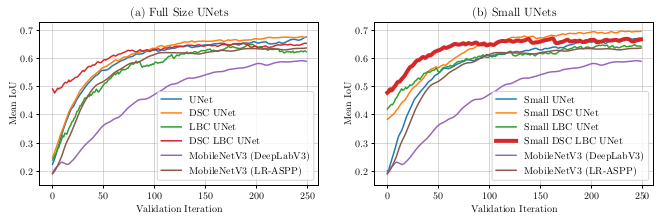

In [12]:
fig, axs = plt.subplots(1,2, figsize=(11,3))
for model in full_list:
    data = curve_dict[model]['iou'][:250]
    if model == 'lbc_unet' or model == 'deeplab_mobile_net':
        data[0] = min(data)
    data_smooth = smooth(scalars=data, weight=0.95)
#     ax.plot(data, label=model)
    axs[0].plot(data_smooth, label=naming_dict[model])
axs[0].grid(alpha=0.5)
axs[0].legend()
axs[0].set_xlabel('Validation Iteration')
axs[0].set_ylabel('Mean IoU')
axs[0].set_ylim(0.15, 0.73)
axs[0].set_title('(a) Full Size UNets')

for model in small_list:
    data = curve_dict[model]['iou'][:250]
    if model == 'lbc_unet' or model == 'deeplab_mobile_net':
        data[0] = min(data)
    data_smooth = smooth(scalars=data, weight=0.95)
#     ax.plot(data, label=model)
    if model == 'small_dsc_lbc_unet':
        axs[1].plot(data_smooth, label=naming_dict[model], linewidth=4.0)
    else:
        axs[1].plot(data_smooth, label=naming_dict[model])
axs[1].grid(alpha=0.5)
axs[1].legend()
axs[1].set_xlabel('Validation Iteration')
axs[1].set_ylabel('Mean IoU')
axs[1].set_ylim(0.15, 0.73)
axs[1].set_title('(b) Small UNets');

In [13]:
fig.savefig("../images/iou_curve.svg", format='svg', dpi=1200)